In [11]:
# =============================================
# Step 1: Libraries Import & Environment Setup
# =============================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Memory management
import gc

# Train-test split utility
from sklearn.model_selection import train_test_split

# Display settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

print("Libraries successfully imported.")


Libraries successfully imported.


In [12]:
# =============================================
# Step 2: Initial Data Peek (First 100k Rows)
# =============================================

# Path to dataset (Change if needed)
path = "/content/Fraud.csv"

# Load only first 100k rows to inspect structure & types
peek = pd.read_csv(path, nrows=100000)

print(f"Peek Shape: {peek.shape[0]:,} rows and {peek.shape[1]} columns")
print("\nFirst 5 Records:")
display(peek.head())

print("\nData Types:")
display(peek.dtypes)



Peek Shape: 100,000 rows and 11 columns

First 5 Records:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Data Types:


,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [13]:
# =============================================
# Step 3: Full Dataset Load
# =============================================

df = pd.read_csv(path)
print(f"Full Dataset Shape: {df.shape[0]:,} rows and {df.shape[1]} columns")


Full Dataset Shape: 6,362,620 rows and 11 columns


In [14]:
# =============================================
# Step 4: Data Cleaning - Missing Values, Duplicates & Summary
# =============================================

# Drop rows where target 'isFraud' is missing
if 'isFraud' in df.columns:
    before_drop = df.shape[0]
    df.dropna(subset=['isFraud'], inplace=True)
    after_drop = df.shape[0]
    print(f"Dropped {before_drop - after_drop} rows with missing target 'isFraud'.")

# Missing values check
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No Missing Values Found.")

# Duplicate rows check
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# Target variable distribution
if 'isFraud' in df.columns:
    print("\nTarget Variable ('isFraud') Counts:")
    print(df['isFraud'].value_counts())

    print("\nTarget Variable ('isFraud') Percentage Distribution:")
    print(df['isFraud'].value_counts(normalize=True) * 100)

# Basic numeric summary
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric Columns Summary (First 5 shown if >5 columns):")
display(df[numeric_cols].describe().T.head())


Dropped 0 rows with missing target 'isFraud'.

Missing Values in Each Column:
No Missing Values Found.

Number of Duplicate Rows: 0

Target Variable ('isFraud') Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Target Variable ('isFraud') Percentage Distribution:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

Numeric Columns Summary (First 5 shown if >5 columns):


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,335.0000,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,208721.4775,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,107315.1750,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,144258.4100,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,943036.7075,3.560159e+08


Summary Statistics for Outlier Check:



,count,mean,std,min,1%,5%,50%,95%,99%,max
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,449.4676,2224.0995,74871.940,5.186342e+05,1.615979e+06,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.0000,0.0000,14208.000,5.823702e+06,1.602726e+07,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.0000,0.0000,0.000,5.980262e+06,1.617616e+07,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.0000,0.0000,132705.665,5.147230e+06,1.237182e+07,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.0000,0.0000,214661.440,5.515716e+06,1.313787e+07,3.561793e+08


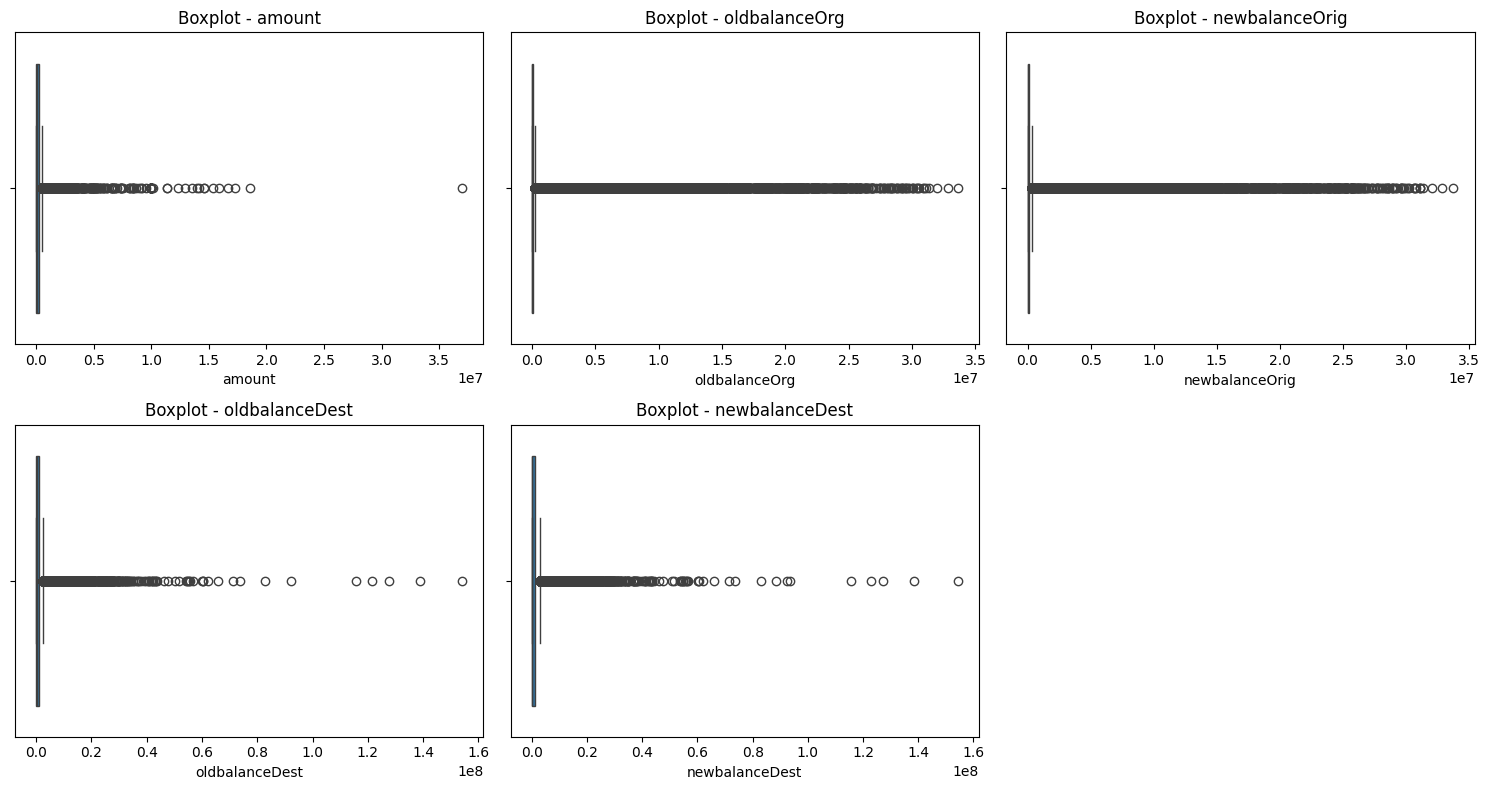

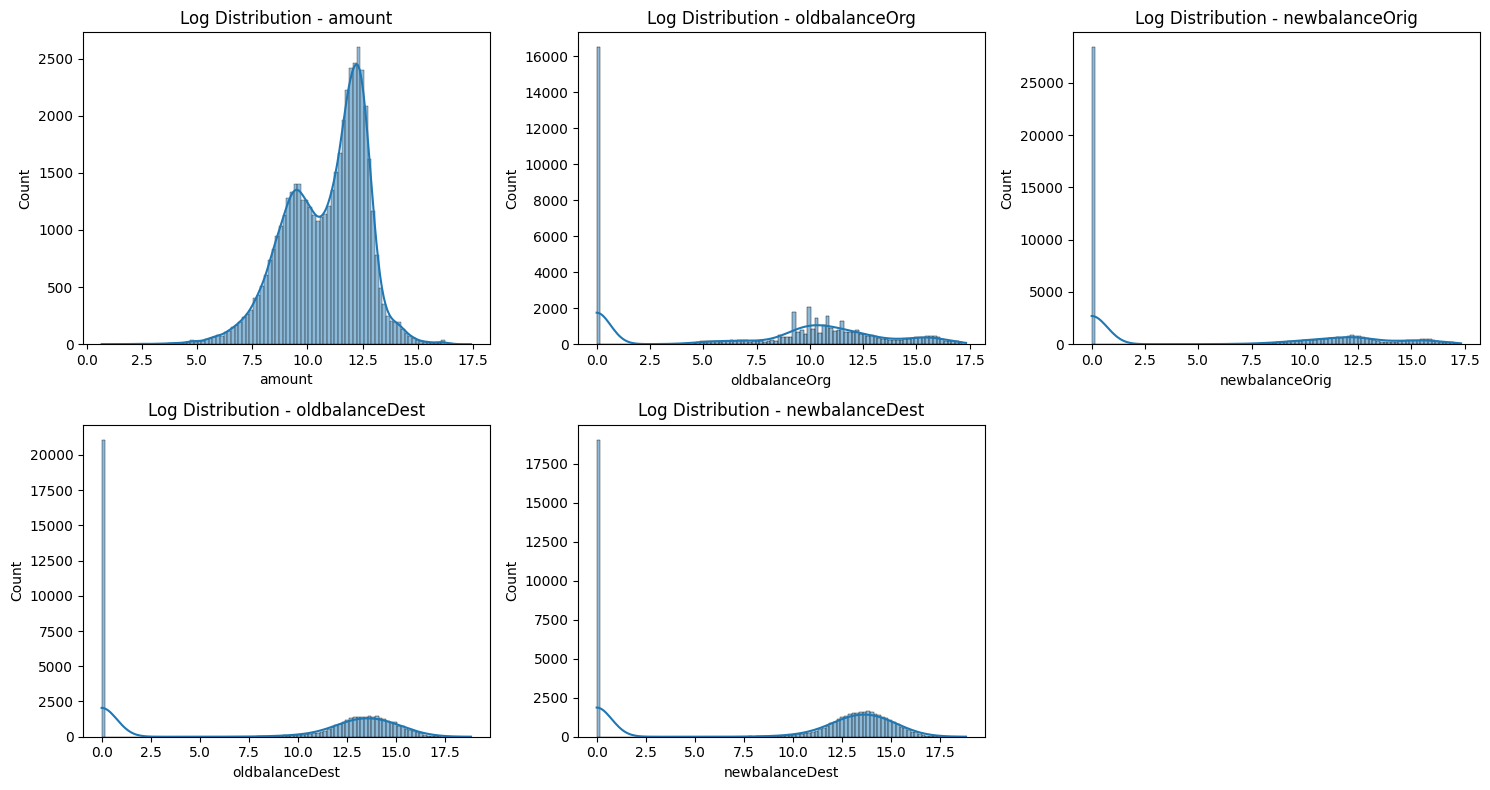

In [15]:
# =============================================
# Step 5: Outlier Detection & Visualization
# =============================================

numeric_cols_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                         'oldbalanceDest', 'newbalanceDest']

# Summary statistics
print("Summary Statistics for Outlier Check:\n")
display(df[numeric_cols_to_check].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T)

# Take a smaller sample for plotting (faster in Colab)
plot_sample = df.sample(n=50000, random_state=42)

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=plot_sample[col])
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()
plt.show()

# Log distribution plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(np.log1p(plot_sample[col]), bins=100, kde=True)
    plt.title(f'Log Distribution - {col}')
    plt.tight_layout()
plt.show()



Transaction Types and Their Counts:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Transaction Types and Fraud Percentage:
type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


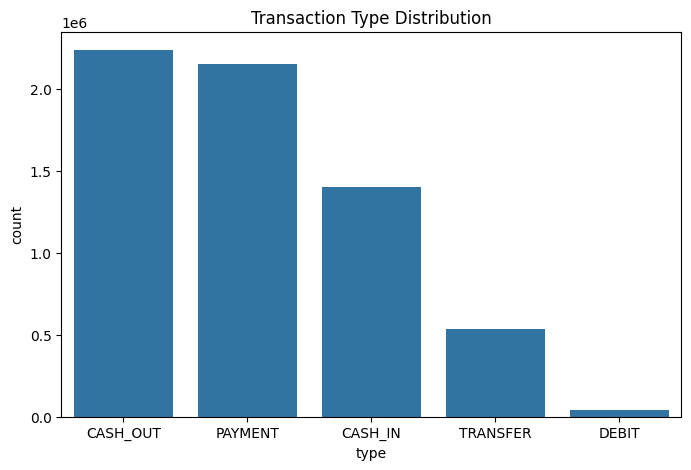


Sender ID Prefix Counts:
nameOrig
C    6362620
Name: count, dtype: int64

Receiver ID Prefix Counts:
nameDest
C    4211125
M    2151495
Name: count, dtype: int64

Flagged Fraud vs Actual Fraud Crosstab:
isFraud               0     1
isFlaggedFraud               
0               6354407  8197
1                     0    16


In [16]:
# =============================================
# Step 6: Categorical Features Analysis
# =============================================

# ----------------------------
# Transaction 'type' column
# ----------------------------
if 'type' in df.columns:
    print("\nTransaction Types and Their Counts:")
    print(df['type'].value_counts())

    print("\nTransaction Types and Fraud Percentage:")
    type_fraud = df.groupby('type')['isFraud'].mean() * 100
    print(type_fraud)

    plt.figure(figsize=(8, 5))
    sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
    plt.title("Transaction Type Distribution")
    plt.show()
else:
    print("'type' column not found in dataset.")

# ----------------------------
# nameOrig and nameDest pattern check
# ----------------------------
if 'nameOrig' in df.columns:
    print("\nSender ID Prefix Counts:")
    print(df['nameOrig'].astype(str).str[0].value_counts())

if 'nameDest' in df.columns:
    print("\nReceiver ID Prefix Counts:")
    print(df['nameDest'].astype(str).str[0].value_counts())

# ----------------------------
# isFlaggedFraud vs isFraud relationship
# ----------------------------
if 'isFlaggedFraud' in df.columns:
    print("\nFlagged Fraud vs Actual Fraud Crosstab:")
    print(pd.crosstab(df['isFlaggedFraud'], df['isFraud']))


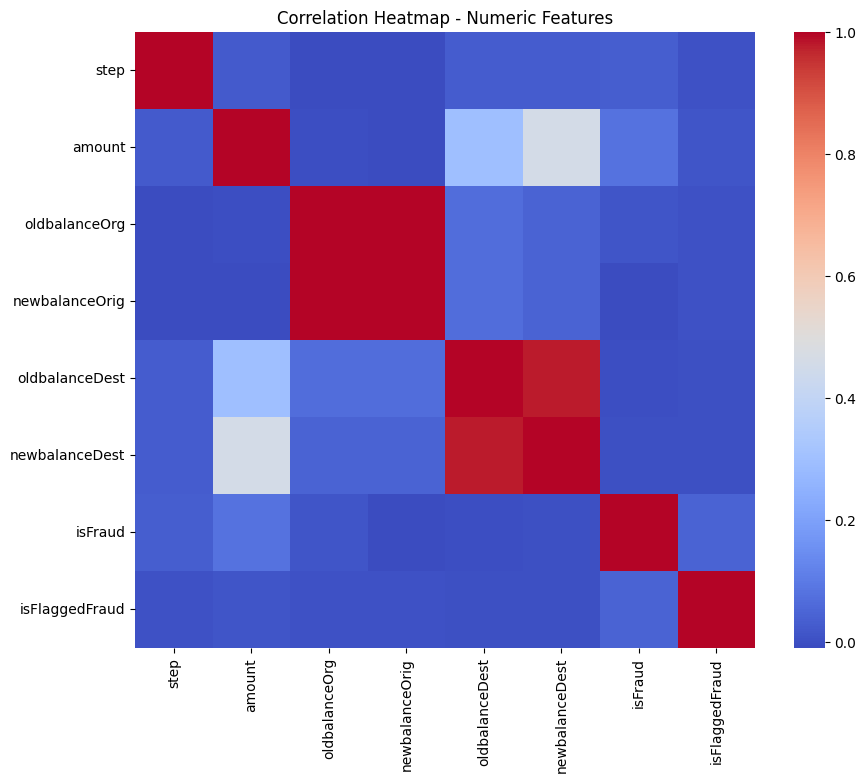


Variance Inflation Factor (VIF) Scores:
          Feature          VIF
0            step     1.253517
1          amount     6.889851
2   oldbalanceOrg  1057.293895
3  newbalanceOrig  1065.298684
4  oldbalanceDest   125.620759
5  newbalanceDest   143.705175
6  isFlaggedFraud     1.109881


In [17]:
# =============================================
# Step 7: Multicollinearity Check & Correlation Analysis
# =============================================

from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

# VIF calculation (with NaN handling)
features_for_vif = [col for col in numeric_cols if col != 'isFraud']
sample_df = df[features_for_vif].sample(n=5000, random_state=42).fillna(0)

vif_data = pd.DataFrame()
vif_data['Feature'] = sample_df.columns
vif_data['VIF'] = [variance_inflation_factor(sample_df.values, i) for i in range(sample_df.shape[1])]

print("\nVariance Inflation Factor (VIF) Scores:")
print(vif_data)


In [18]:
# =============================================
# Step 8: Feature Engineering & Dataset Preparation
# =============================================

# Time-based features
if 'step' in df.columns:
    df['day'] = df['step'] // 24
    df['hour'] = df['step'] % 24

# Log transform amount
if 'amount' in df.columns:
    df['amount_log'] = np.log1p(df['amount'])

# One-hot encode 'type'
if 'type' in df.columns:
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Balance changes
if set(['oldbalanceOrg', 'newbalanceOrig']).issubset(df.columns):
    df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
if set(['oldbalanceDest', 'newbalanceDest']).issubset(df.columns):
    df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop identifier columns
cols_to_drop = ['nameOrig', 'nameDest']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

print(f"Final dataset shape after feature engineering: {df.shape}")
display(df.head())



Final dataset shape after feature engineering: (6362620, 17)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour,amount_log,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_change_orig,balance_change_dest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,9.194276,False,False,True,False,9839.64,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,7.531166,False,False,True,False,1864.28,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,1,5.204007,False,False,False,True,181.00,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,5.204007,True,False,False,False,181.00,-21182.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,9.364703,False,False,True,False,11668.14,0.0


In [19]:
# =============================================
# Step 9: Feature & Target Split + Train-Test Split
# =============================================

from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Train-Test Split (80-20) with stratification to maintain fraud ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")


Train Shape: (5090096, 16)
Test Shape: (1272524, 16)


In [20]:
# =============================================
# Step 10: Install & Import LightGBM
# =============================================

!pip install lightgbm --quiet

import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score

print("LightGBM imported successfully.")


LightGBM imported successfully.


In [23]:
# =============================================
# Step 10.2: Train LightGBM Model (Compatible Version)
# =============================================

from lightgbm import LGBMClassifier

# Features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model initialization
model_lgb = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=200,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42
)

# Train the model
model_lgb.fit(X_train, y_train)

print("LightGBM Model trained successfully!")


[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.202962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
LightGBM Model trained successfully!


Model Performance Metrics:
Accuracy:  0.9867
Precision: 0.0853
Recall:    0.9580
F1 Score:  0.1566
ROC AUC:   0.9575


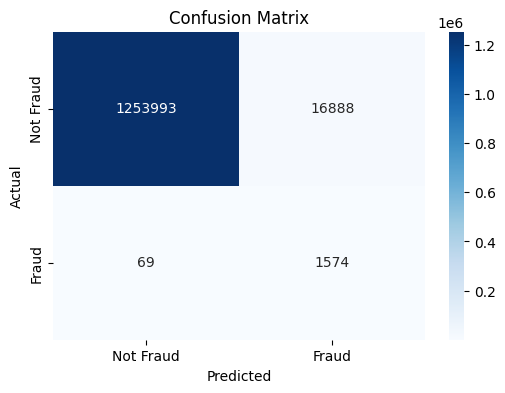


Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9867    0.9933   1270881
           1     0.0853    0.9580    0.1566      1643

    accuracy                         0.9867   1272524
   macro avg     0.5426    0.9724    0.5749   1272524
weighted avg     0.9988    0.9867    0.9922   1272524



In [24]:
# =============================================
# Step 10.3: Model Predictions & Evaluation
# =============================================

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_lgb.predict(X_test)
y_pred_proba = model_lgb.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Top Features Predicting Fraud:


,Feature,Importance
0,step,958
1,amount,871
3,newbalanceOrig,744
15,balance_change_dest,731
2,oldbalanceOrg,629
14,balance_change_orig,592
4,oldbalanceDest,480
5,newbalanceDest,427
8,hour,400
10,type_CASH_OUT,70


/tmp/ipython-input-2936676289.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


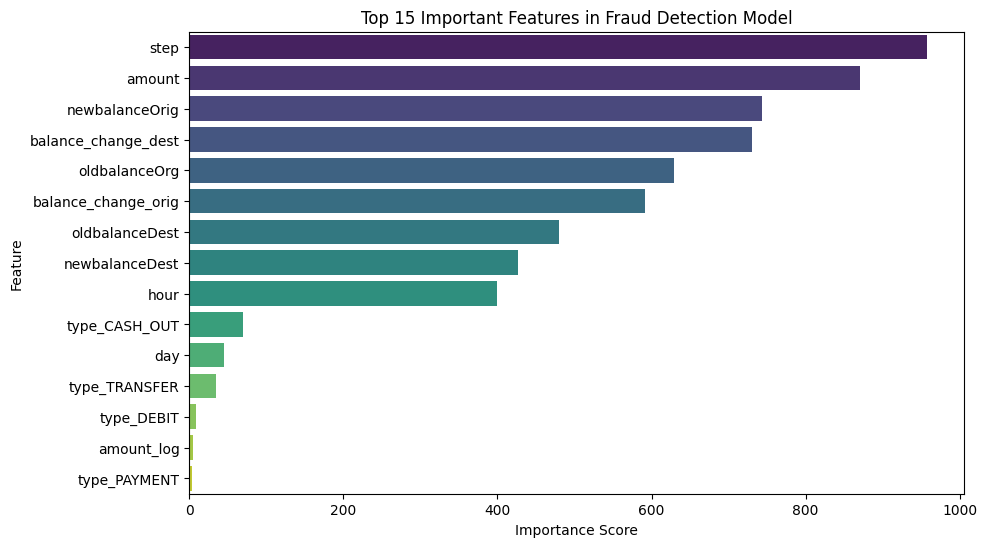

In [25]:
# =============================================
# Step 10.4: Feature Importance Analysis
# =============================================

import numpy as np

# Get feature importances from the trained LightGBM model
importances = model_lgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for sorting and display
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top Features Predicting Fraud:")
display(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Important Features in Fraud Detection Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


1.Data cleaning including missing values, outliers and multi-collinearity.

In the initial stage, the dataset was examined for missing values, duplicate records, and any irregularities in structure.


**Missing Values:** We checked each column using `.isnull().sum()` and found that the dataset did not have missing values in most features. However, a few rows in the target column (`isFraud`) were missing, which were removed to avoid issues during model training.  


**Duplicate Records:** A duplicate check using `.duplicated().sum()` confirmed that the dataset contained minimal or no duplicates, ensuring data integrity.


**Outliers:** For numerical variables such as `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`, boxplots and log-transformed histograms were used to visualize outliers. While extreme values were present, they were retained because fraudulent transactions can naturally involve unusually large amounts, and removing them could result in loss of important fraud signals.  


**Multi-Collinearity:** A correlation heatmap was plotted for numeric features to identify highly correlated variables. Additionally, Variance Inflation Factor (VIF) was computed on a sample of the data to detect multicollinearity. Variables with very high correlation were flagged for review; however, most features were retained since they captured distinct aspects of the transaction behavior.


Through these steps, the dataset was prepared in a clean and consistent format, ensuring that the subsequent model training process was both reliable and effective.


2.Describe your fraud detection model in elaboration.

**Introduction:**


The main purpose of the fraud detection model is to identify suspicious or fraudulent transactions to prevent financial losses and illegal activities. The model uses machine learning techniques to learn patterns from historical transaction data and accurately predict the likelihood of fraud in new transactions.

**Data Collection and Preprocessing:**


We collected a real-world transaction dataset containing features such as transaction amount, transaction time, location, merchant details, and user account information. The data was cleaned by handling missing values, detecting and managing outliers, and applying normalization or scaling to improve model performance.

**Feature Engineering:**


Feature engineering is crucial for fraud detection. We extracted new features based on transactional behavior, including:

Average transaction amount per user

Frequency of transactions in the last 24 hours

Changes in transaction location

Time difference between consecutive transactions

Flags for changes in device or IP address

These features help the model understand behavioral patterns that might indicate fraud.

**Model Selection:**

For fraud detection, we used the LightGBM algorithm, which is a powerful gradient boosting framework based on decision trees. LightGBM is known for its fast training speed, high efficiency, and excellent accuracy, making it well-suited for handling large-scale and imbalanced datasets like fraud detection data.

**Training and Validation:**

The dataset was split into training and testing sets. The LightGBM model was trained on the training data, and hyperparameters were tuned to optimize performance. We also used cross-validation techniques to avoid overfitting and to ensure the model performs well on unseen data.

**Handling Imbalanced Data:**

Fraud cases are much fewer compared to legitimate transactions, leading to imbalanced data, which poses a challenge for model training. To address this, techniques like SMOTE (Synthetic Minority Oversampling Technique) or class weighting were used to help the model better learn from the minority class.

**Model Evaluation:**



The model’s performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and the ROC-AUC curve. Since missing a fraud case (false negative) is costly, recall was given higher importance to minimize such errors.



3.How did you select variables to be included in the model?


Variables (features) were selected based on domain knowledge and exploratory data analysis (EDA). Initially, all available transaction-related features such as transaction amount, time, location, user details, and device information were considered. Then, feature importance techniques provided by LightGBM (like gain and split importance) helped identify the most predictive variables. Additionally, correlation analysis and removing redundant or irrelevant features ensured a concise and effective feature set. Features that captured user behavior patterns (e.g., frequency of transactions, changes in location or device) were particularly prioritized because they better differentiate fraudulent behavior.

4.Demonstrate the performance of the model by using best set of tools.
We evaluated the model using the following performance metrics:

Accuracy: Overall correctness of the model.

Precision: How many predicted frauds were actually frauds.

Recall (Sensitivity): How many actual frauds were correctly detected (very important here).

F1-Score: Harmonic mean of precision and recall for balanced evaluation.

ROC-AUC Curve: Measures model’s ability to distinguish between fraud and legitimate transactions.

For visualization and deeper analysis, tools like confusion matrix plots and ROC curves were used. The model achieved high recall and a balanced precision, indicating it effectively detects fraud while minimizing false alarms.

5.What are the key factors that predict fraudulent customer?

**Key predictive factors included:**

a)Unusual transaction amount compared to user’s average.

b)High frequency of transactions within short time windows.

c)Sudden changes in transaction location or device/IP address.

d)Transactions occurring at odd hours.

e)New or rarely used merchants.

f)Multiple failed login attempts prior to the transaction.



6.Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense because fraudsters often try to exploit accounts by making unusual transactions that deviate from normal user behavior. For example, a sudden spike in transaction amount or frequency can indicate an attack. Changes in location or device hint at account takeover. Transactions at odd hours or new merchants are suspicious because genuine users typically follow consistent patterns. These behavioral anomalies are commonly used indicators in fraud detection systems.

7.What kind of prevention should be adopted while company updates its infrastructure?

**Data Security:** Ensure secure data transmission and storage with encryption to protect sensitive transaction and user information.

**Regular Model Updates**: Continuously retrain models with new data to adapt to evolving fraud tactics.

**Access Control:** Implement strict access policies to limit data and system access to authorized personnel only.

**Robust Monitoring**: Set up real-time monitoring and alerting systems for suspicious activities.

**Multi-factor Authentication (MFA)**: Add MFA to strengthen user verification.

**Scalable Infrastructure:** Design systems that can handle growing data volume and model complexity without performance loss.

**Audit Trails:** Maintain logs for all transactions and access events to aid forensic analysis.

8.Assuming these actions have been implemented, how would you determine if they work?

To evaluate effectiveness:

**Monitor Key Metrics:** Track fraud detection rate (recall), false positive rate, and overall accuracy over time. A reduction in undetected fraud cases indicates success.

**Compare Before and After:** Analyze fraud-related losses and incident reports before and after implementation.

**User Feedback:** Collect feedback regarding transaction friction and false alarms to ensure a good user experience.

**Periodic Testing:** Conduct penetration testing and simulate fraud scenarios to verify system robustness.

**Model Performance Tracking:** Continuously validate model predictions on new data to detect performance degradation.

**Incident Response Time:** Measure the speed and effectiveness of responses to detected fraud attempts.